<a href="https://colab.research.google.com/github/Cindyyyhey/CSC373_data_mining/blob/main/BayesAssign1_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this program, you will be coding some of the ideas around Bayes classification.

**For most of this coding assignment, you may not use packages or "canned" code in your program other than simple function calls to needed math functions or file I/O. I.e., do not use a Bayes classifier that you did not write. However, for making histograms, plotting, or visualization, you may use other software. You may want to make this part of your package use.**

The input file is a csv file named *BayesAssign1_??.dat* and is located in the Data folder on Google. Note: ?? is a number. Look in the folder for possibly more than 1 data file. They were built with different parameters.

Each  line is an observation that has the class indicator, "NEG" or "POS", followed by numeric values for one feature. NEG indicates the absence of a disease or other characteristic. POS indicates the presence.

The values for each class come from Gaussian distributions. 

Split the data into train and test sets. Determine the statistics for each distribution (mean and variance), NEG and POS, from the training data. Using this information, classify the data in the test set.

Print to the console the following values:
* estimated mean and standard deviation for each class.
* estimated prior probability of each class
* percentage of the data used for training
* prevalence
* accuracy
* sensitivity
* specificity
* precision (positive predicitive value)
* a confusion matrix (does not have to be in matrix form - just label the numbers)

You may want to output your classified test data. If so, perhaps on each line would be: actual class, predicted class, value.

You could read this data into other programs for analysis, ...

**Other ideas**

* Make plots, on the same graph, of two Gaussians using the mean and variance you calculated.
* Plot histograms of the original data.
* How do your estimated parameters and performance vary with training fraction?
* Discuss how this might work if one or both of the distributions were uniform in the interval [a, b] instead of both Gaussian.
* Discuss how this might work for more than one class.
* Discuss how this might work for multi-dimensional (more than one feature) observations. E.g., 2-D Gaussians.






In [ ]:
'''
Functions and imports for Bayes Assignment #1
'''
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

#Return the Gaussian probability density function for x given mean = m and sigma = s
def gauss_val(x, m, s):
  val = math.exp(-math.pow((x-m)/s,2)/2.0)/(s*math.sqrt(math.pi*2))
  return(val)

#Generate Gaussian values for each class
#  Add uniform noise
def gen_gauss_list(stats, cl_names, num, noise_fact):
  g_vals = []
  for i in range(num):
    c = random.random()
    #Is the sample from class 0 or from class 1?
    if (c < stats[2]):
      new_val = random.gauss(stats[0], stats[1])
      noise_val = random.uniform(-noise_fact*stats[1], noise_fact*stats[1])
      new_val += noise_val
      g_vals.append([cl_names[0], new_val])
    else:
      new_val = random.gauss(stats[3], stats[4])
      noise_val = random.uniform(-noise_fact*stats[4], noise_fact*stats[4])
      new_val += noise_val      
      g_vals.append([cl_names[1], new_val])
  return(g_vals)

In [ ]:
'''
Generate data for Bayes Assignment #1. Assume 2 Gaussians for now

Students do not need this code, and it is only here in case of interest
  of if they want to make their own data to check their code.
  If so, change the output file name below.
Note: parameters given below are not those used for data provided.

'''

if __name__ == "__main__":

  #Class conditional parameters for two Gaussians.
  MEAN_0 = 0.0
  SIG_0  = 1.0
  PROB_0 = 0.5
  MEAN_1 = 1.0
  SIG_1  = 2.0
  PROB_1 = 1 - PROB_0

  STATS = [MEAN_0, SIG_0, PROB_0, MEAN_1, SIG_1, PROB_1]
  CLASS_NAMES = ["NEG", "POS"]

  SEED = 977894657
  random.seed(SEED)

  #Noise can be added as a fraction of the sigma for each class.
  NOISE_FACT = 0.0

  NUM_VALUES = 10000

  #Print parameters
  print("Actual parameters: {:.4f} {:.4f} {:.4f} {:.4f} {:.4f} {:.4f}".format(MEAN_0, SIG_0, PROB_0, \
                                                                              MEAN_1, SIG_1, PROB_1))
  print("Noise factor: {:.4f}".format(NOISE_FACT))
  print()

  val_list = gen_gauss_list(STATS, CLASS_NAMES, NUM_VALUES, NOISE_FACT)

  #Output file name. Students should use their folder and name.
  out_file_name = 'MY OUTPUT FILE NAME'

  #Write output csv file
  with open(out_file_name, 'w') as out_file_ptr:
    for i in range(len(val_list)):
      pass
      out_str = "{:s}, {:7.4f}\n".format(val_list[i][0], val_list[i][1])
      out_file_ptr.write(out_str)


  print("END")


Actual parameters: 0.0000 1.0000 0.5000 1.0000 2.0000 0.5000
Noise factor: 0.0000

END


**Sample output from running  the data generation code.**

Actual parameters: 0.0000 1.0000 0.5000 1.0000 2.0000 0.5000

Noise factor: 0.0000

END


In [ ]:
'''
Bayes Classification - input data, split train and test sets,
  train by estimating the parameters for the two class Gaussians
  (mean, sigma, and class probability),then classify the test set.
'''

if __name__ == "__main__":

SyntaxError: unexpected EOF while parsing (<ipython-input-3-78f93a43ea05>, line 7)

**Sample output from running the classification code.**

Training fraction: 0.7 10000 7000 3000

Estimated parameters (mean0, sig0, prob0, mean1, sig1, prob1): 0.0046 1.0103 0.4917 1.0268 2.0142 0.4917

True POS:  785

False POS: 217

True NEG:  1294

False NEG: 704


Prevalence:    0.496

Accuracy:      0.693

Sensitivity:   0.527

Specificity:   0.856

Precision:     0.783

PPV:           0.783


In [ ]:
'''
Histogram plotting - or other analysis students may like to do.

I used information from the links below to code histogram plots.

https://matplotlib.org/stable/gallery/statistics/hist.html
https://stackoverflow.com/questions/33203645/how-to-plot-a-histogram-using-matplotlib-in-python-with-a-list-of-data


'''

# Read data

In [ ]:
data = pd.read_csv("/Users/Jerry/Desktop/CSC373/jupyter notebook/data/BayesAssign1_01.csv",header = None,names=['class', 'x'])
data.head()

,class,x
0,NEG,0.5269
1,POS,1.0280
2,NEG,0.3218
3,NEG,0.0342
4,NEG,1.5655


# Shuffle the data and split to training set and testing set

In [ ]:
data = data.sample(frac = 1,random_state = 1)
data.head()
#Got shuffle successful

,class,x
507,NEG,-0.6828
818,NEG,-1.3496
452,NEG,-0.7985
368,NEG,1.3966
242,NEG,2.1220


In [ ]:
len(data)

1000

In [ ]:
testData = data[:300]
trainData = data[300:]
print(len(testData),len(trainData))

300 700


# P(N) and P(P)

In [ ]:
probN = trainData["class"].value_counts()["NEG"]/len(trainData)
probP = trainData["class"].value_counts()["POS"]/len(trainData)
print("P(N) = {} and P(P) = {}".format(probN,probP))

P(N) = 0.7757142857142857 and P(P) = 0.22428571428571428


# Calculate the mean and standard deviation for x(assume normal distribution)

According to the histogram of x, it is approximately bell shape so we decided to use normal distribution

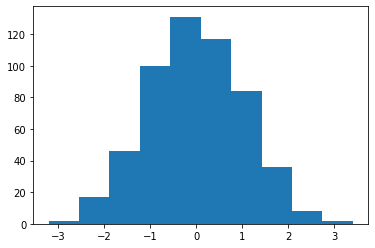

In [ ]:
plt.hist(trainData[trainData["class"]=="NEG"]["x"])
plt.show() 

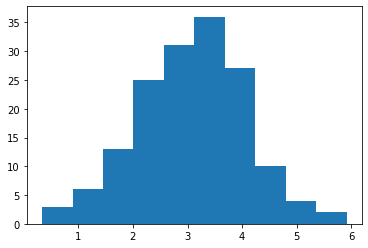

In [ ]:
plt.hist(trainData[trainData["class"]=="POS"]["x"])
plt.show() 

# From the histogram, we notice that there is a big difference between the mean and sd between neg and pos group.

In [ ]:
meanNEG = sum(trainData[trainData["class"]=="NEG"]["x"])/len(trainData[trainData["class"]=="NEG"])
meanNEG

-0.01595782688766112

In [ ]:
standNEG = sum((trainData[trainData["class"]=="NEG"]["x"]-meanNEG)**2)/(len(trainData[trainData["class"]=="NEG"])-1)
standNEG = standNEG**0.5
standNEG

1.0223110204238923

In [ ]:
meanPOS = sum(trainData[trainData["class"]=="POS"]["x"])/len(trainData[trainData["class"]=="POS"])
meanPOS

3.066441401273885

In [ ]:
standPOS = sum((trainData[trainData["class"]=="POS"]["x"]-meanPOS)**2)/(len(trainData[trainData["class"]=="POS"])-1)
standPOS = standPOS**0.5
standPOS

0.9966268857324145

In [ ]:
#Return the Gaussian probability density function for x given mean = m and sigma = s
def gauss_val(x, m, s):
    val = math.exp(-math.pow((x-m)/s,2)/2.0)/(s*math.sqrt(math.pi*2))
    return(val)

In [ ]:
correctCounts = 0
for index, row in testData.iterrows():
    inN = probN * gauss_val(row['x'], meanNEG, standNEG)
    inP = probP * gauss_val(row['x'], meanPOS, standPOS)
    print(inN,inP,row["x"])
    if(inN > inP):
        pred = "NEG"
    else:
        pred = "POS"
        
    testData.at[index,'pred'] = pred
    print("prediction is",pred,"class is",row["class"])
    if(pred == row['class']):
        correctCounts +=1
correctCounts

In [ ]:
correctCounts/len(testData)

0.9433333333333334

# Accuracy of test dataset

In [ ]:
sum(testData["class"]==testData["pred"])/len(testData)

0.9433333333333334

prevalence
accuracy
sensitivity
specificity
precision (positive predicitive value)
a confusion matrix (does not have to be in matrix form - just label the numbers)

True Positive (TP) is an outcome where the model correctly predicts the positive class.

True Negative (TN) is an outcome where the model correctly predicts the negative class.

False Positive (FP) is an outcome where the model incorrectly predicts the positive class.

False Negative (FN) is an outcome where the model incorrectly predicts the negative class.

In [ ]:
TP = len(testData.loc[(testData["class"]=="POS") & (testData["pred"]=="POS")])
TP

60

In [ ]:
TN = len(testData.loc[(testData["class"]=="NEG") & (testData["pred"]=="NEG")])
TN

223

In [ ]:
FP = len(testData.loc[(testData["class"]=="NEG") & (testData["pred"]=="POS")])
FP

8

In [ ]:
FN = len(testData.loc[(testData["class"]=="POS") & (testData["pred"]=="NEG")])
FN

9

In [ ]:
accuracy = (TP+TN)/(TP+FP+FN+TN)
accuracy

0.9433333333333334

In [ ]:
sensitivity = TP/(TP+FN)
sensitivity

0.8695652173913043

In [ ]:
specificity = TN/(FP+TN)
specificity

0.9653679653679653

In [ ]:
precision = TP/(TP+FP)
precision

0.8823529411764706